# Análisis de sentimiento usando sklearn y spacy

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@uc.cl> <br />
**Github:** <https://github.com/rpmunoz> <br />

Instale la libreria spacy
```
pip install spacy
```

Descargue modelos pre-entrenados desde la web de spacy https://spacy.io/usage/models

```
python -m spacy download en_core_web_sm
python -m spacy download es_core_news_sm
```

## Analisis exploratorio

In [29]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
pd.set_option('display.max_columns', None)

In [2]:
dataDir='data'
resultsDir='results'

if not os.path.exists(resultsDir):
    os.mkdir(resultsDir)

Descripcion de las columnas

- Rating: Evaluacion de la pelicula en el sitio web IMDB. Valores entre 1 y 10. (https://www.imdb.com/)
- Metascore: Evaluacion de la pelicula en el sitio web Metacritic. Valores entre 1 y 100 (https://www.metacritic.com/movie)


In [100]:
dataFile='Reviews IMDB-Movie-Data.csv'
dataFile=os.path.join(dataDir, dataFile)

dataDF=pd.read_csv(dataFile, header=0)
dataDF.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


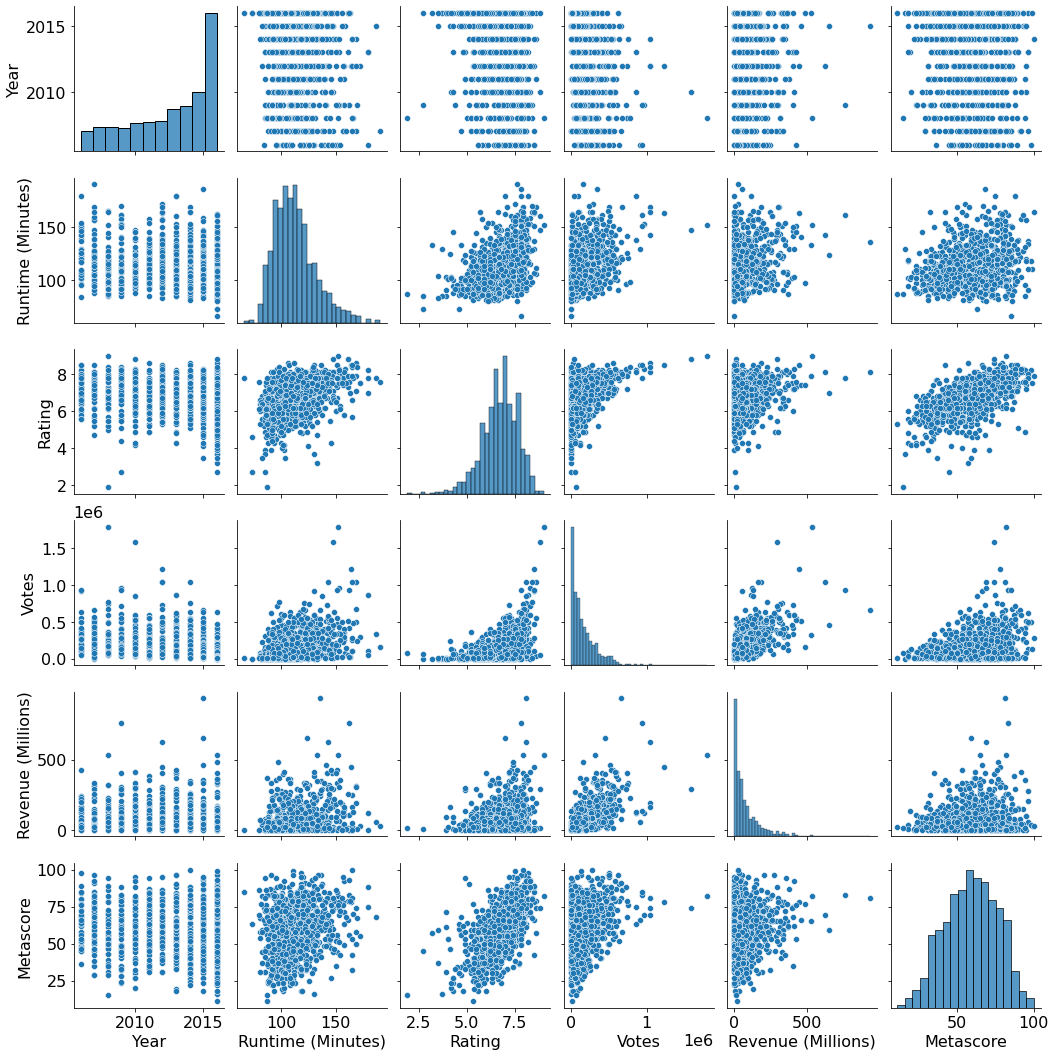

In [101]:
g = sns.pairplot(dataDF.drop(['Rank'], axis=1))

<AxesSubplot:xlabel='Year', ylabel='Count'>

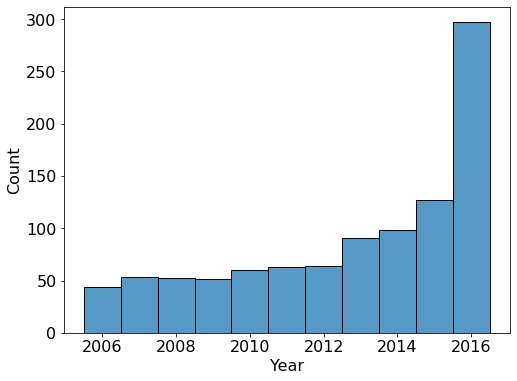

In [102]:
plt.figure(figsize=(8,6))
sns.histplot(x='Year', data=dataDF, discrete=True)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

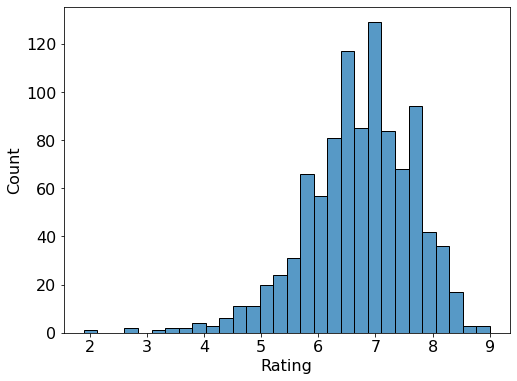

In [103]:
plt.figure(figsize=(8,6))
sns.histplot(x='Rating', data=dataDF)

## Analisis de clustering

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.manifold import TSNE

In [105]:
def plot_inertia(X):

    sse={}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
        sse[k] = kmeans.inertia_ 

    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.show()

In [106]:
dataDF.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [115]:
clusterDF = dataDF[['Runtime (Minutes)', 'Rating', 'Votes']].dropna(how='any')
XStd = StandardScaler().fit_transform(clusterDF.values)
XStd[0:5]

array([[ 0.41634975,  1.45699912,  3.11268996],
       [ 0.57591149,  0.29292371,  1.67495992],
       [ 0.20360077,  0.61039882, -0.06467572],
       [-0.27508443,  0.50457378, -0.57912902],
       [ 0.52272424, -0.5536766 ,  1.18683856]])

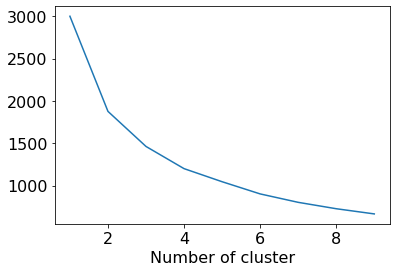

In [116]:
plot_inertia(XStd)

In [109]:
nClusters = 2
kmeans = KMeans(n_clusters=nClusters, max_iter=1000).fit(X_std)
clusterDF['label'] = kmeans.labels_

clusterDF.head()

,Runtime (Minutes),Rating,Votes,label
0,121,8.1,757074,1
1,124,7.0,485820,1
2,117,7.3,157606,1
3,108,7.2,60545,0
4,123,6.2,393727,1


In [110]:
for name, group in clusterDF.groupby('label'):
    print("Cluster ID: ", name)
    print("Rating mean: {:.1f}".format(np.mean(group['Rating'])))
    print("Votes mean: {:.0f}".format(np.mean(group['Votes'])))
    print()

Cluster ID:  0
Rating mean: 6.3
Votes mean: 77517

Cluster ID:  1
Rating mean: 7.5
Votes mean: 314770



In [111]:
# Invoking the t-SNE method
tsne = TSNE()
x_tsne = tsne.fit_transform(X_std)

<AxesSubplot:>

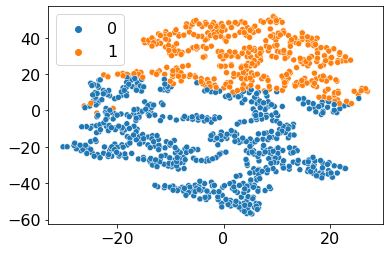

In [112]:
current_palette = sns.color_palette("tab10", n_colors=nClusters)
sns.scatterplot(x=x_tsne[:,0], y=x_tsne[:,1], hue=kmeans.labels_, palette=current_palette)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

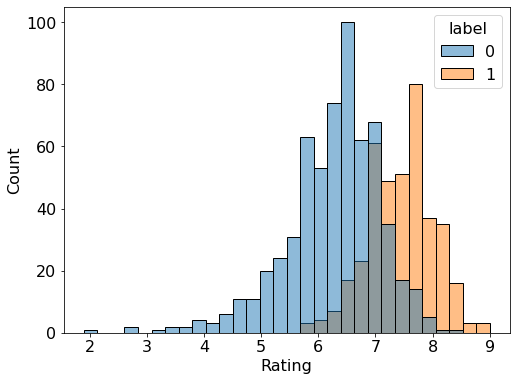

In [113]:
plt.figure(figsize=(8,6))
sns.histplot(x='Rating', hue='label', data=clusterDF, palette=current_palette)

## Separacion entre train and test dataset

In [114]:
# Splitting Data Set
from sklearn.model_selection import train_test_split

In [ ]:
# Features and Labels
X = dataDF['contenido']
y = dataDF['Label']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=42)

## Preprocessing the data using Spacy and Machine learning model training using sklearn

In this stage, Spacy package of python is used to lemmatize and remove stop words from the obtained dataset.

In [7]:
import spacy
from  spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')

# To build a list of stop words for filtering
stopwords = list(STOP_WORDS)
print("Lista de stop words o palabras reservadas\n")
print(stopwords)

Lista de stop words o palabras reservadas

['perhaps', 'whereas', 'towards', 'amount', 'least', 'say', 'we', 'herself', 'and', 'sixty', 'ever', 'may', 'often', 'along', 'cannot', 'nobody', 'must', 'whereby', 'n’t', 'latter', 'neither', 'own', 'see', 'nevertheless', 'herein', 'why', 'our', 'n‘t', 'whose', 'with', 'four', 'against', 'latterly', 'seem', 'across', "'ll", 'go', '’d', 'ca', 'two', 'already', 'her', 'side', 'seems', 'please', 'since', 'anywhere', 'between', 'beside', 'its', 'from', 'hereby', 'otherwise', 'thus', 'they', 'fifteen', 'enough', 'became', 'there', '‘d', 'somewhere', 'three', 'him', 'might', 'no', 'on', 'unless', 'mostly', 'those', 'sometime', 'what', 'anything', 'an', 'nothing', 'call', 'was', 'never', 're', '’m', 'thereafter', 'done', 'elsewhere', 'still', 'fifty', 'however', 'forty', 'through', 'per', 'eleven', 'former', 'part', 'six', 'while', 'something', 'around', 'can', 'to', 'his', 'ten', 'doing', 'else', 'then', 'much', 'rather', 'now', 'further', 'are', '

In [8]:
import string
from spacy.lang.en import English

punctuations = string.punctuation
# Creating a Spacy Parser
parser = English()